1. 데이터 불러오기 & 확인
2. EDA
3. feature engineering(전처리)
4. 모델링
5. 모델로 예측/분류

In [ ]:
pip install missingno

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
#한글 나오게
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [3]:
dfTrain=pd.read_csv('../../Downloads/train.csv', parse_dates=['datetime']) #datetime 열은 날짜 형식으로 읽어온다
dfTest=pd.read_csv('../../Downloads/test.csv', parse_dates=['datetime']) #datetime 열은 날짜 형식으로 읽어온다

dfTrain.info()
dfTest.info()
dfTrain.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [34]:
dfTrain.isnull().sum()/len(dfTrain)

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

In [26]:
for c in dfTrain.columns:
    print("col:{:>10}\t Percent of Nan : {:.2f}%".format(
        c,dfTrain.isnull()[c].sum()/len(dfTrain)))

col:  datetime	 Percent of Nan : 0.00%
col:    season	 Percent of Nan : 0.00%
col:   holiday	 Percent of Nan : 0.00%
col:workingday	 Percent of Nan : 0.00%
col:   weather	 Percent of Nan : 0.00%
col:      temp	 Percent of Nan : 0.00%
col:     atemp	 Percent of Nan : 0.00%
col:  humidity	 Percent of Nan : 0.00%
col: windspeed	 Percent of Nan : 0.00%
col:    casual	 Percent of Nan : 0.00%
col:registered	 Percent of Nan : 0.00%
col:     count	 Percent of Nan : 0.00%


결측값 시각화
- 외도
- 첨도
- 정규화(로그)

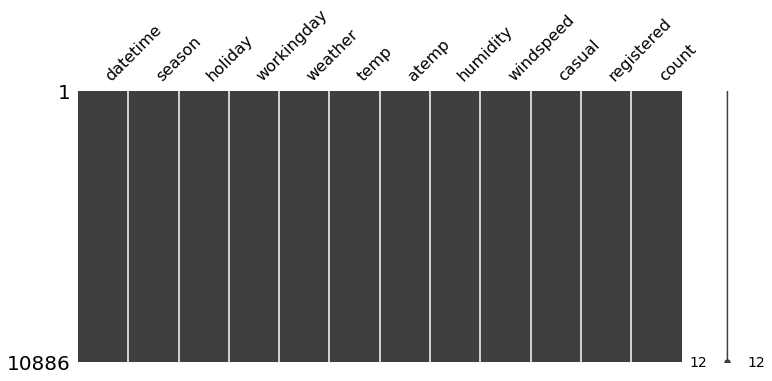

In [30]:
msno.matrix(dfTrain, figsize=(12,5)) #결측값이 흰색으로 나옴

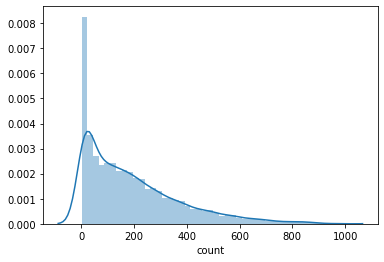

In [60]:
sns.distplot(dfTrain['count']) #오른쪽 치우침임!

In [59]:
dfTrain['count'].skew() 

1.2420662117180776

## 외도

- skewness(비대칭도): 
    - 분포가 얼마나 비대칭인지 알려주는 척도 => 어느쪽으로 치우쳐져 있는지, 
    - 0이면 정규분포
    - 0보다 작으면 오른쪽 치우침. 0보다 크면 왼쪽 치우침  
    - When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve.
    - When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.

In [41]:
dfTrain['count'].kurt()

1.3000929518398334

## 첨도
- kurtosis(첨도): 
    - 확률분포의 뽀족한 정도
    - 0이면 표준정규분포
    - 0보다 크면 뾰족, 0보다 작으면 더 넓게 퍼져있다

**연도, 월, 일, 시간** 뽑기

In [8]:
dfTrain['year']=dfTrain['datetime'].dt.year
dfTrain['month']=dfTrain['datetime'].dt.month
dfTrain['day']=dfTrain['datetime'].dt.day
dfTrain['hour']=dfTrain['datetime'].dt.hour
dfTrain['weekday']=dfTrain['datetime'].dt.dayofweek #0:월, 6:일요일

In [9]:
dfTest['year']=dfTest['datetime'].dt.year
dfTest['month']=dfTest['datetime'].dt.month
dfTest['day']=dfTest['datetime'].dt.day
dfTest['hour']=dfTest['datetime'].dt.hour
dfTest['weekday']=dfTest['datetime'].dt.dayofweek 

x축-년/월/일/시, y축-count

In [48]:
dfTrain['count']

dfTrain['year']
dfTrain['month']
dfTrain['day']
dfTrain['hour']

0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: hour, Length: 10886, dtype: int64

In [62]:
dfTrain.groupby('year')[['count','month']].mean()

,count,month
year,,
2011,144.223349,6.538547
2012,238.560944,6.504575


피벗테이블 열마다 함수 다르게 못하나?

In [66]:
dfTrain.pivot_table('count',index='year',aggfunc=(np.mean,sum))

,mean,sum
year,,
2011,144.223349,781979.0
2012,238.560944,1303497.0


In [65]:
dfTrain.pivot_table('count',index='year',aggfunc=['mean','sum'])

,mean,sum
,count,count
year,,
2011,144.223349,781979
2012,238.560944,1303497


### barplot
    y축 별도 설정하지 않으면 전체 평균값  
    설정하면 설정된 컬럼의 평균값

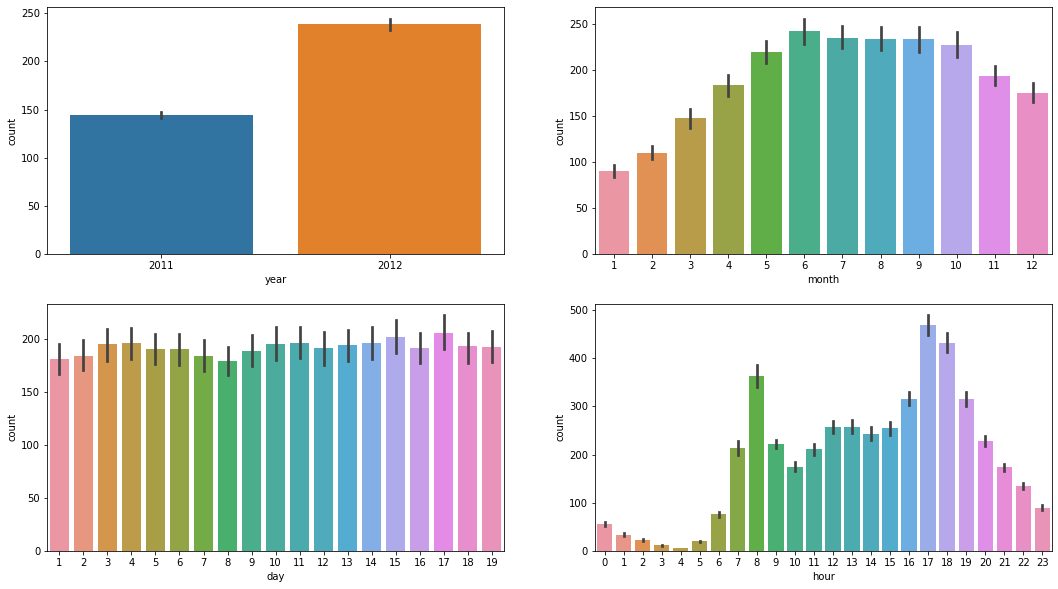

In [78]:
#sns.barplot(data=dfTrain)
fig,axes=plt.subplots(2,2)
fig.set_size_inches(18,10)
sns.barplot(data=dfTrain, x='year', y='count', ax=axes[0][0])
sns.barplot(data=dfTrain, x='month', y='count', ax=axes[0][1])
sns.barplot(data=dfTrain, x='day', y='count', ax=axes[1][0])
sns.barplot(data=dfTrain, x='hour', y='count', ax=axes[1][1])

요일정보 확인하기 **평일/주말** 확인

In [56]:
dfTrain['weekday']=dfTrain['datetime'].dt.dayofweek #0:월, 6:일요일
dfTest['weekday']=dfTest['datetime'].dt.dayofweek 

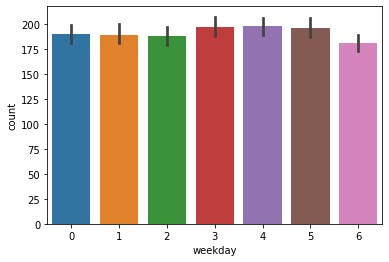

In [84]:
sns.barplot(data=dfTrain, x='weekday', y='count')


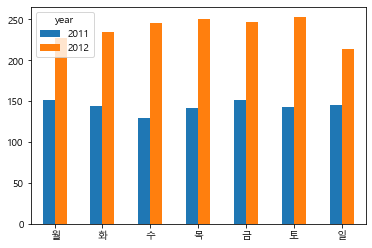

In [89]:
df_weekday=dfTrain.pivot_table(index='weekday',columns='year',values='count')
df_weekday.index=['월','화','수','목','금','토','일']
df_weekday.plot.bar(rot=0)

In [85]:
dfTrain['weekday'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: weekday, dtype: int64

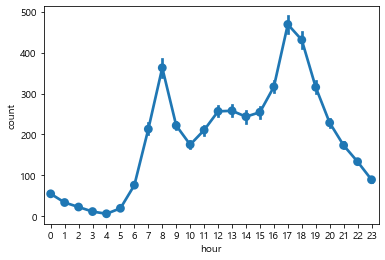

In [90]:
#x축 hour로 고정 y축 count -> 시간에 흐름에 따른 대여량 평균의 변화
sns.pointplot(data=dfTrain, x='hour',y='count')

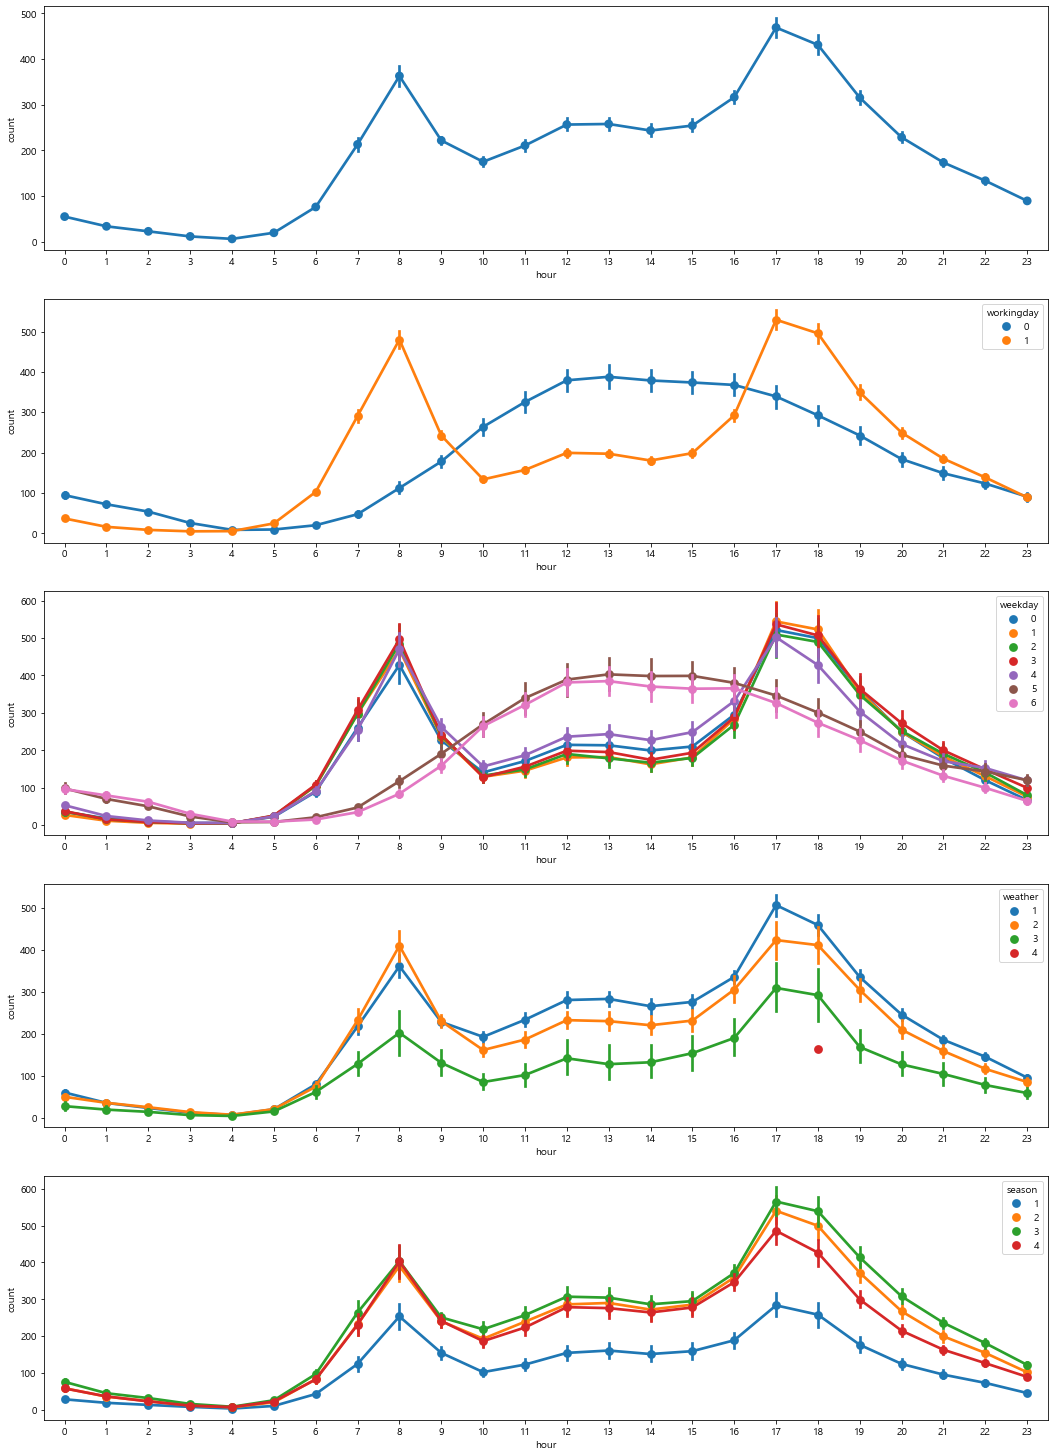

In [95]:
fig,axes=plt.subplots(5)
fig.set_size_inches(18,26)

sns.pointplot(data=dfTrain, x='hour', y='count', ax=axes[0])
sns.pointplot(data=dfTrain, x='hour', y='count', ax=axes[1], hue='workingday')
sns.pointplot(data=dfTrain, x='hour', y='count', ax=axes[2], hue='weekday')
sns.pointplot(data=dfTrain, x='hour', y='count', ax=axes[3], hue='weather')
sns.pointplot(data=dfTrain, x='hour', y='count', ax=axes[4], hue='season')

## 상관계수
- 선택 열에 대해 상관계수 행렬을 구하고 
- 히트맵으로 시각화

In [97]:
dfTrain.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [6]:
cData=dfTrain[['temp','atemp','humidity','windspeed','casual','registered','count']]

In [100]:
cData.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


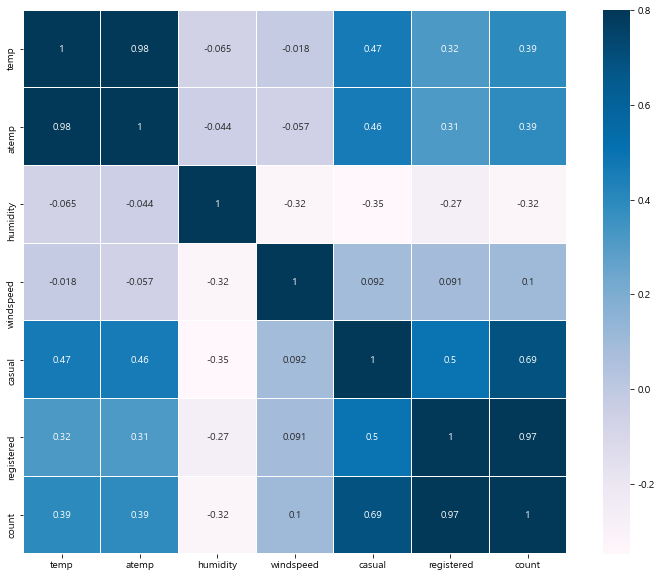

In [8]:
plt.subplots(figsize=(13,10))
sns.heatmap(cData.corr(), annot=True, linewidths=0.2, cmap=plt.cm.PuBu,
           vmax=0.8, annot_kws={'size':10}, square=True)

## 다중공선성
: 독립변수들이 서로 선형 독립이 아닌 경우  
예측 모델의 일부 독립 변수가 다른 독립 변수와 상관 관계가 높아서 데이터 분석에 부정적인 영향을 주게되는 현상  

$y=x1+x2+...+x5$  
=> 독립변수(x)끼리 상관관계가 높으면 종속변수(y)에 영향을 미친다  

- 해결:  
VIF값 조사 -> 10이상이면 다중공선성 있는 것으로 생각하여 해당변수를 제거(변수 선택) / 차원축소(pca)한다

ex) 
교통사고량(y), 빙판길(x1), 눈(x2), 영하(x3), ...

temp와 atemp의 경우

x축: temp, windspeed, humidity  
y축: count  
data: count열과 temp열  
scatter plot

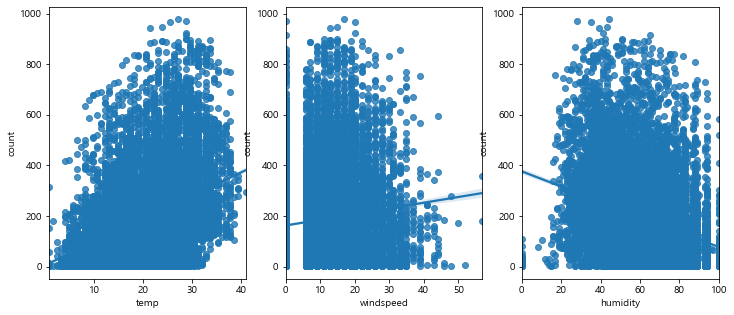

In [13]:
fig, axes=plt.subplots(ncols=3,figsize=(12,5)) #1=72px
sns.regplot(x='temp',y='count',data=dfTrain, scatter=True, ax=axes[0])
sns.regplot(x='windspeed',y='count',data=dfTrain, scatter=True, ax=axes[1])
sns.regplot(x='humidity',y='count',data=dfTrain, scatter=True, ax=axes[2])

풍속 0값 확인하기 위해 넓게 시각화(범주화함)

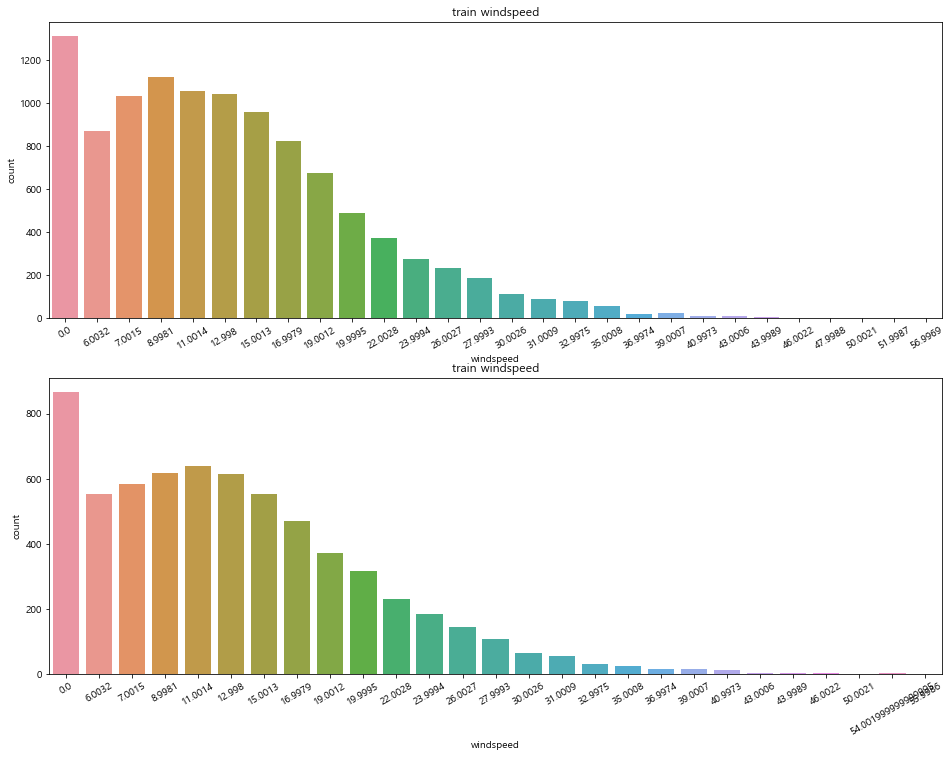

In [21]:
fix,axes=plt.subplots(nrows=2, figsize=(16,12))
plt.sca(axes[0])
plt.xticks(rotation=30)
axes[0].set(ylabel="count",title="train windspeed")
sns.countplot(data=dfTrain, x='windspeed', ax=axes[0])
#countplot : 카테고리별로 데이터의 개수를 출력, 데이터프레임에서만 사용 가능

plt.sca(axes[1])
plt.xticks(rotation=30)
axes[1].set(ylabel="count",title="train windspeed")
sns.countplot(data=dfTest, x='windspeed', ax=axes[1])

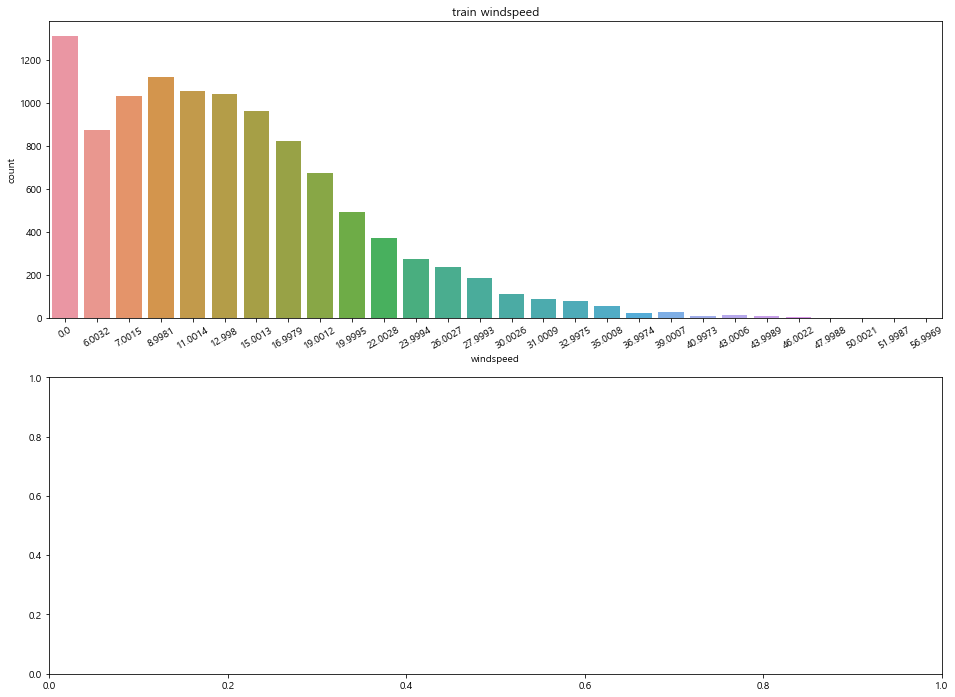

In [19]:
fix,axes=plt.subplots(nrows=2, figsize=(16,12))

#countplot : 카테고리별로 데이터의 개수를 출력, 데이터프레임에서만 사용 가능

### year 별 시각화  
x축: year와 month 기준, 2011-1 2011-2 식으로 연도와 월 결합   
y축: count 값  


In [22]:
def myconcat(dt):
    return f"{dt.year}-{dt.month}"

In [29]:
dfTrain['datetime'].dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [23]:
dfTrain['datetime'].apply(myconcat)

0         2011-1
1         2011-1
2         2011-1
3         2011-1
4         2011-1
          ...   
10881    2012-12
10882    2012-12
10883    2012-12
10884    2012-12
10885    2012-12
Name: datetime, Length: 10886, dtype: object

In [28]:
dfTrain['ym']=dfTrain['datetime'].apply(myconcat)
dfTest['ym']=dfTest['datetime'].apply(myconcat)

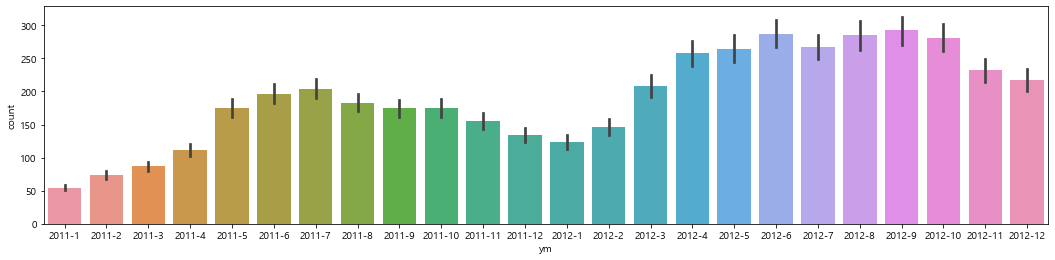

In [33]:
plt.subplots(figsize=(18,4))
sns.barplot(x='ym',y='count', data=dfTrain)

In [43]:
#각 문자가 몇번 나왔는지 리스트안에 튜플 형식으로 담는다
from collections import Counter
Counter('hello world').most_common()
#Counter('hello world').most_common(1) #1위로 많이 나온 단어
Counter('Hello World') #딕셔너리에 담김
Counter('Hello World').items()

[('l', 3),
 ('o', 2),
 ('h', 1),
 ('e', 1),
 (' ', 1),
 ('w', 1),
 ('r', 1),
 ('d', 1)]

## 이상치 제거
IQR*1.5를 Q1에서 빼거나 Q3에서 더해서 그 기준으로준으로 이상치 제거

In [84]:
li=[]
a=[]
b=[3,5]
li.extend(a+b)
li

[3, 5]

In [108]:
def detectOutliers(df, features):
    outlierIndices=[]
    for col in features:
        Q1=np.percentile(df[col],25) #25% 지점의 값
        Q3=np.percentile(df[col],75) #75% 지점의 값
        IQR=Q3-Q1
        outlierStep=IQR*1.5
        
        outlierCol=df[(df[col] < Q1-outlierStep) | (df[col] > Q3+outlierStep)].index
        #print(outlierCol)
        outlierIndices.extend(outlierCol)
        #print(outlierIndices)
        oi=Counter(outlierIndices)
        #print(oi)
        multipleOutliers=[k for k,v in oi.items() if v>2]
        print(multipleOutliers)
        
        
detectOutliers(dfTrain, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])


[]
[]
[]
[]
[]
[]
[6658, 6779, 6825, 6849, 6850, 6897, 7088, 7640, 7641, 7664, 7881, 8002, 8024, 8048, 8049, 8456, 8768, 8793, 8794, 8962, 8984, 8986, 9008, 9243, 9244, 9267, 9296, 9320, 9392, 9632, 9652, 9655, 9800, 9920, 7017, 7473, 7991, 8000, 8528, 9479]


In [112]:
def detectOutliers(df, features):
    outlierIndices=[]
    for col in features:
        Q1=np.percentile(df[col],25) #25% 지점의 값
        Q3=np.percentile(df[col],75) #75% 지점의 값
        IQR=Q3-Q1
        outlierStep=IQR*1.5
        
        outlierCol=df[(df[col] < Q1-outlierStep) | (df[col] > Q3+outlierStep)].index #이상치 위치
        #print(outlierCol)
        outlierIndices.extend(outlierCol) #outlierIndices에 인덱스 정보 확장해서 넣음 (모든 이상치 인덱스의 집합)
        #print(outlierIndices)
        oi=Counter(outlierIndices)
        multipleOutliers=[k for k,v in oi.items() if v>2] #1173이 k, 횟수 1이 v. 7개의 열중 3개 이상의 항목에서 outlier가 발생한 데이터 index
        return multipleOutliers

outliersToDrop=detectOutliers(dfTrain, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])
outliersToDrop

[]

In [52]:
dfTrain.loc[outliersToDrop]

dfTrain=dfTrain.drop(outliersToDrop, axis=0).reset_index(drop=True)
dfTrain.shape

(10886, 13)

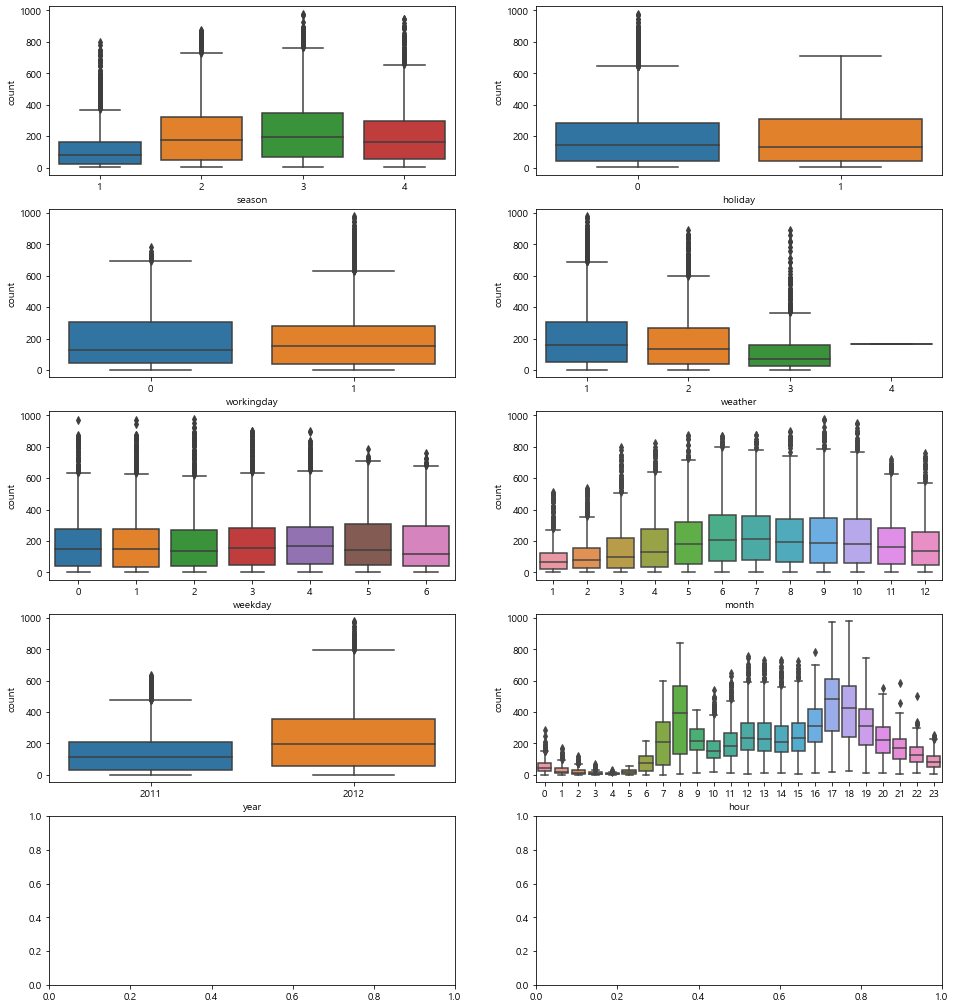

In [60]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(16, 18))
sns.boxplot(data = dfTrain, y="count", x = "season", orient = "v", ax = axes[0][0]) 
sns.boxplot(data = dfTrain, y="count", x = "holiday", orient = "v", ax = axes[0][1])
sns.boxplot(data = dfTrain, y="count", x = "workingday", orient = "v", ax = axes[1][0]) 
sns.boxplot(data = dfTrain, y="count", x = "weather", orient = "v", ax = axes[1][1]) 
sns.boxplot(data = dfTrain, y="count", x = "weekday", orient = "v", ax = axes[2][0]) 
sns.boxplot(data = dfTrain, y="count", x = "month", orient = "v", ax = axes[2][1])
sns.boxplot(data = dfTrain, y="count", x = "year", orient = "v", ax = axes[3][0]) 
sns.boxplot(data = dfTrain, y="count", x = "hour", orient = "v", ax = axes[3][1])


dict_items([('H', 1), ('e', 1), ('l', 3), ('o', 2), (' ', 1), ('W', 1), ('r', 1), ('d', 1)])

In [ ]:
2615 6541
4242 2102
4443 5155
2767 5155

## 더미화
카테고리화된 데이터가 수치로 분류 된 경우 고유번호 부여 (one hot encoding 같은건가)  
ex) season열  
1 -> 1000  
2 -> 0100  
3 -> 0010  
4 -> 0001  

## 의사결정트리
겨울인 가족사진 찾기  
만화인가? > 겨울인가? > 가족인가? 식으로 질문을 만들어 소거  

**정보획득** 값이 가장 큰 엔트로피를 찾아 질문을 만든다.

정보획득(information gain)=base 엔트로피 - new 엔트로피


확률변수(Y)가 이산확률변수일 때 엔트로피 정의  
    $H[Y]=−\sum_{k=1}^{K}p(yk)log2p(yk)$

  

base 엔트로피 -> 정답의 확률과 그 외의 확률 (고정)  
new 엔트로피 -> 카툰, 겨율 등 여러 기준으로 확률나누기. (독립)


확률(p)가 0.5일때 (반반일때) 엔트로피가 **가장 높다**  
어느 한쪽이 p=1이고 나머지는 p=0처럼 한쪽 확률이 높을 때 엔트로피가 **가장 낮다.**  

엔트로피 확률분포 그려보면 종모양확률분포 그려보면 종모양  
지니불순도 - 지니불순도는 엔트로피처럼 확률분포가 어느쪽에 치우쳐있는가를 재는 척도지만 로그를 사용하지 않으므로 계산량이 더 적어 엔트로피 대용으로 많이 사용된다.   
$G[Y]=\sum_{k=1}^{K}P(yk)(1−P(yk))$




target: 참가여부  
base entropy 구하기

In [117]:
-9/14*np.log2(9/14)-5/14*np.log2(5/14)

0.9402859586706311

In [122]:
#new entropy
#날씨로 분할했을 때
5/14*(-2/5*np.log2(2/5)-3/5*np.log2(3/5)-3/5*np.log2(3/5)-2/5*np.log2(2/5))

#온도, 습도, 바람으로 분할 했을 때 
#비교해서 new entropy가 가장 작은 값을 우선 적용

#결과를 base entropy로 정해서 반복

0.6935361388961918

In [111]:
np.log2(0.6)

-0.7369655941662062

랜덤 포레스트로 test 데이터 count 예측

In [65]:
dfTrain.columns
cfn=['season', 'holiday', 'workingday', 'weather','year', 'month', 'hour','weekday']

In [12]:
for v in cfn:
    dfTrain[v]=dfTrain[v].astype('category')
    dfTest[v]=dfTest[v].astype('category')


In [13]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  category      
 13  month       10886 non-null  category      
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  category      
 16  weekday     10886 non-

In [80]:
feature_names=['season', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'year', 'hour', 'weekday', 'holiday','month','windspeed']

In [67]:
xTrain=dfTrain[feature_names]
xTrain.shape
xTest=dfTest[feature_names]
xTest.shape

(6493, 11)

In [68]:
labelName='count'
yTrain=dfTrain[labelName] #트레이닝 데이터 정답트레이닝 데이터 정답

앙상블 모델은 대부분 사이킷런에 있음

""" train 데이터 모델링 해서 예측 """

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
rfModel=RandomForestRegressor(n_estimators=10, random_state=43) #트리개수

In [42]:
rfModel.fit(xTrain,yTrain)

RandomForestRegressor(n_estimators=5, random_state=43)

In [43]:
rfModel.predict(xTrain)

array([ 16. ,  36.8,  25.6, ..., 179. , 146.6,  78.4])

In [44]:
yTrain

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [47]:
predTest=rfModel.predict(xTest)
predTest

array([ 10. ,   3.6,   5.8, ..., 101.6,  97.2,  50.8])

In [50]:
sub=pd.read_csv("../../Downloads/sampleSubmission.csv")
sub['count']=predTest
sub

,datetime,count
0,2011-01-20 00:00:00,10.0
1,2011-01-20 01:00:00,3.6
2,2011-01-20 02:00:00,5.8
3,2011-01-20 03:00:00,4.4
4,2011-01-20 04:00:00,3.0
...,...,...
6488,2012-12-31 19:00:00,219.4
6489,2012-12-31 20:00:00,186.0
6490,2012-12-31 21:00:00,101.6
6491,2012-12-31 22:00:00,97.2


In [53]:
sub.to_csv('mysubmission.csv', index=False) #0.43772

count열(정답열)에 로그취해서 랜덤포레스트 돌리고 다시 지수화해서 예측

In [70]:
yTrainLog=np.log1p(yTrain)

In [71]:
rfModel.fit(xTrain, yTrainLog)

RandomForestRegressor(n_estimators=10, random_state=43)

In [76]:
preds=rfModel.predict(xTest)
preds

array([2.38541979, 1.80668589, 1.5514332 , ..., 4.83659095, 4.6663095 ,
       4.03312443])

In [77]:
preds=np.exp(preds)
preds

array([ 10.86362212,   6.09023024,   4.71822752, ..., 126.03894543,
       106.30470048,  56.43696946])

In [78]:
sub=pd.read_csv("../../Downloads/sampleSubmission.csv")
sub['count']=preds
sub

,datetime,count
0,2011-01-20 00:00:00,10.863622
1,2011-01-20 01:00:00,6.090230
2,2011-01-20 02:00:00,4.718228
3,2011-01-20 03:00:00,4.162766
4,2011-01-20 04:00:00,3.318574
...,...,...
6488,2012-12-31 19:00:00,249.049332
6489,2012-12-31 20:00:00,179.751156
6490,2012-12-31 21:00:00,126.038945
6491,2012-12-31 22:00:00,106.304700


In [79]:
sub.to_csv('mysubmission.csv', index=False) #0.43772

In [81]:
xTrain=dfTrain[feature_names]
xTest=dfTest[feature_names]
yTrain=dfTrain['count']

In [86]:
from sklearn.ensemble import RandomForestRegressor

rfModel=RandomForestRegressor(n_estimators=12) #트리개수 12개로 랜덤포레스트 모델생성
yTrainLog=np.log1p(yTrain) #정답에 로그화
rfModel.fit(xTrain,yTrainLog) #트레인데이터(데이터/답) 넣어서 학습
pred=rfModel.predict(xTest) #테스트데이터 넣어서 예측
pred=np.exp(pred)

sub=pd.read_csv("../../Downloads/sampleSubmission.csv") #정답넣을 곳 가져와서
sub['count']=pred #정답 넣기
sub.to_csv('submission.csv', index=False) #저장